<a href="https://colab.research.google.com/github/NehaKumari500092077/Visual-Computing/blob/main/Assignment1_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 4: Bit Plane Slicing (5 Marks)**

Given two images A and B, hide the most significant bit plane of image B in one of the
bit planes of image A, to generate image A’ such that A and A’ are visually identical. Use
a_1_task_4_a.png as input A and a_1_task_4_b.png as input B. Which bit plane of
image A did you use for this purpose? Write your answer in a text cell with justification.
You DO NOT have to verify using OpenCV, as there is no direct OpenCV
implementation for this task. Instead, show the images A and A’. Also, submit the image
A’ as <roll_number>_Task4_output.png.


Original image



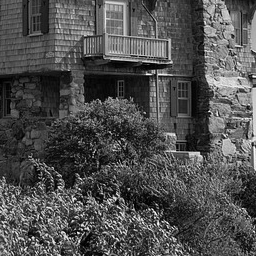


Modified image



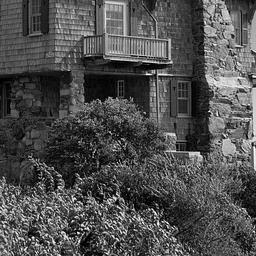

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load images A and B in grayscale
image_a = cv2.imread('/content/a_1_task_4_a.png', cv2.IMREAD_GRAYSCALE)
image_b = cv2.imread('/content/a_1_task_4_b.png', cv2.IMREAD_GRAYSCALE)

# Extract bit planes from image A
bit_planes_a = [(image_a >> i) & 1 for i in range(8)]

# Extract the MSB plane from image B
msb_b = (image_b >> 7) & 1

# Choose the least significant bit plane of image A for hiding
# Here we are assuming it's the 0th bit plane
bit_plane_to_replace = 0

# Replace the chosen bit plane with the MSB of image B
bit_planes_a[bit_plane_to_replace] = msb_b

# Reconstruct image A' from the modified bit planes
image_a_prime = np.sum([bit_planes_a[i] << i for i in range(len(bit_planes_a))], axis=0)

# Save and display results
# saving image A'
cv2.imwrite('/content/24AI91R06_Task4_output.png', image_a_prime)

# Display images
print("Original image\n")
cv2_imshow(image_a)
print("\nModified image\n")
cv2_imshow(image_a_prime)

The following factors were taken into account when selecting 0th bit plane of image A:


(i)Visual Impact: The 0th bit plane in an 8-bit grayscale image is the least significant bit, meaning it has the least bearing on the appearance of the image as a whole. The effects of changing this plane are typically less noticeable than those of changing higher-order bit planes.


(ii)Steganographic Strategy: To effectively disguise the MSB of image B, it is embedded in the 0th bit plane of image A. With the 0th bit plane, a respectable trade-off is made between data capacity and visibility. Though less obvious, changes in the 0th bit plane allow essential data (like the MSB) to be incorporated without materially affecting the image's visual quality.
